<a href="https://colab.research.google.com/github/kKn00077/techit-travel-data-analysis/blob/main/china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

외래관광객조사_2023_중국편

In [1]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gdown

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import gdown

# 스프레드시트 ID
file_id = '1IaknkivoN5gKRPdGysv_fN0zCrEotB3Z'

# CSV 다운로드 링크 생성
download_url = f"https://drive.google.com/uc?id={file_id}"

# 다운로드 파일명 지정
output = '외래관광객조사_2023_데이터.txt'

# 파일 다운로드
gdown.download(download_url, output, quiet=False)

# 데이터 불러오기
df = pd.read_csv(output, delimiter = '\t', encoding='cp949', low_memory=False)
display(df.head(), df.shape)

Downloading...
From: https://drive.google.com/uc?id=1IaknkivoN5gKRPdGysv_fN0zCrEotB3Z
To: /content/외래관광객조사_2023_데이터.txt
100%|██████████| 15.4M/15.4M [00:00<00:00, 36.3MB/s]


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506


(16196, 365)

In [3]:
# 파일 ID 정의
file1_id = '1X55Dgcqvv8nQ1BGkmbF-nRtAf_nKnYWI'  # 항목정의서
file2_id = '1xTfcSqlKnM_mXavvXJrZRJUCvZyMndlh'  # 코드정의서

# 다운로드 URL 정의
file1_url = f"https://drive.google.com/uc?id={file1_id}"
file2_url = f"https://drive.google.com/uc?id={file2_id}"

# 출력 파일명
file1_output = '외래관광객조사_2023_항목정의서.csv'
file2_output = '외래관광객조사_2023_코드정의서.csv'

# 파일 다운로드
gdown.download(file1_url, file1_output, quiet=False)
gdown.download(file2_url, file2_output, quiet=False)

# 데이터 로드
columns_info_df = pd.read_csv(file1_output)
columns_value_df = pd.read_csv(file2_output)

# display(columns_info_df.head())
# display(columns_value_df.head())

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)

    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

Downloading...
From: https://drive.google.com/uc?id=1X55Dgcqvv8nQ1BGkmbF-nRtAf_nKnYWI
To: /content/외래관광객조사_2023_항목정의서.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 22.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xTfcSqlKnM_mXavvXJrZRJUCvZyMndlh
To: /content/외래관광객조사_2023_코드정의서.csv
100%|██████████| 302k/302k [00:00<00:00, 5.21MB/s]


,항목ID,항목명,변수명,코드값,코드명,비고,Unnamed: 6
0,3.0,한국 방문횟수(카테고리),RVIT,1,1회,NaN,NaN
1,3.0,한국 방문횟수(카테고리),RVIT,2,2회,NaN,NaN
2,3.0,한국 방문횟수(카테고리),RVIT,3,3회,NaN,NaN
3,3.0,한국 방문횟수(카테고리),RVIT,4,4회 이상,NaN,NaN
4,3.0,한국 방문횟수(카테고리),RVIT,5,재방문,NaN,NaN
...,...,...,...,...,...,...,...
6384,363.0,방한횟수별,D_NUM,3,3회,NaN,NaN
6385,363.0,방한횟수별,D_NUM,4,4회 이상,NaN,NaN
6386,364.0,여행형태별,D_GUB,1,개별여행,분석변수,NaN
6387,364.0,여행형태별,D_GUB,2,AIR-TEL,NaN,NaN


In [4]:
df.fillna(-1, inplace=True)

In [5]:
# 중국 방한 여행객 데이터
chinese_df = df[df['D_NAT'] == 1]
chinese_df.info()
print(chinese_df.shape) # row: 1588, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)

display(chinese_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 16195
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(17), object(1)
memory usage: 4.4+ MB
(1588, 365)


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a99,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R1일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,...,MDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외,MDAY전체TOT_RAW61항공제외2,RDAY전체,RDAY전체TOT_RAW2,RDAY전체TOT_RAW61,RDAY전체_개별국제교통비제외,RDAY전체TOT_RAW61항공제외2,MDAY개별대체,MDAY에어대체,MDAY단체대체,MDAY개별61대체,MDAY에어61대체,MDAY단체61대체,MDAY개별61항공제외대체,MDAY에어61항공제외대체,MDAY단체61항공제외대체,RDAY개별대체,RDAY에어대체,RDAY단체대체,RDAY개별61대체,RDAY에어61대체,RDAY단체61대체,RDAY개별61항공제외대체,RDAY에어61항공제외대체,RDAY단체61항공제외대체,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q13,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,3.0,13.0,2.0,3.0,6.0,4.0,3.0,1.0,5.0,-1.0,6.0,4.0,8.0,-1.0,-1.0,-1.0,11.0,1,-1.0,2.0,-1.0,-1.0,5.0,-1.0,-1.0,8.0,-1.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,2.0,3.0,11521.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,6.0,7.0,7.0,2.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,286.76,231.61,231.61,3.0,3.0,3.0,3.0,3.0,286.76,-1.0,-1.0,286.76,-1.0,-1.0,231.61,-1.0,-1.0,3.0,-1.0,-1.0,3.0,-1.0,-1.0,3.0,-1.0,-1.0,0.0,0.0,0.0,772.04,0.0,0.0,386.02,0.0,0.0,0.0,0.0,0.0,0.00,0.0,77.2,0.0,0.0,772.04,0.00,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,8.0,9.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,40.0,10.0,0.0,0.0,0.0,0.0,5.0,7.0,-1.0,5,-1.0,5.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,5,5,5,5,5,5,5,5,5,5,-1.0,5,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,3.0,6.0,-1.0,4.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,1,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,4.0,1.0,11012.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,70.0

In [6]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}

# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in chinese_df.columns:
        chinese_df.loc[:, col] = chinese_df[col].map(mapping).fillna(chinese_df[col])

데이터 분석 및 시각화

In [7]:
# 방한하는 나이, 성별, 연령대 분석

# 성별, 연령, 목적, 방한 횟수, 그외 ...
info_df = chinese_df[['D_SEX',  # 성별
                      'D_AGE',  # 나이
                      'D_MOK',  # 방한목적별
                      'D_NUM',  # 방한횟수별
                      'Q1_1a1', # 한국여행 관심 계기 1순위
                      'Q1_1a2', # 한국여행 관심 계기 2순위
                      'Q1_1a3', # 한국여행 관심 계기 3순위
                      'Q2a1',   # 방문을 고려한 아시아 국가 1순위
                      'Q2a2',   # 방문을 고려한 아시아 국가 2순위
                      'Q2a3',   # 방문을 고려한 아시아 국가 3순위
                      'Q2a_dk', # 방문을 고려한 아시아 국가 없음 (15)
                      'Q2_1a1', # 해당국가 관심 계기 1순위
                      'Q2_1a2', # 해당국가 관심 계기 2순위
                      'Q2_1a3', # 해당국가 관심 계기 3순위
                      'Q3_1a1', # 고려한 관광활동 1순위
                      'Q3_1a2', # 고려한 관광활동 2순위
                      'Q3_1a3', # 고려한 관광활동 3순위
                      'Q3_2a1', # 고려한 관광인프라 1순위
                      'Q3_2a2', # 고려한 관광인프라 2순위
                      'Q3_2a3', # 고려한 관광인프라 3순위
                      'Q4a1',   # 여행전 한국관련 정보 수집 경로 1순위
                      'Q4a2',   # 여행전 한국관련 정보 수집 경로 2순위
                      'Q4a3',   # 여행전 한국관련 정보 수집 경로 3순위
                      'Q4a_dk', # 여행전 한국관련 정보 수집 경로 없음 (9)
                      'Q4_1a1', # 주로 이용한 사이트 1순위
                      'Q4_1a2', # 주로 이용한 사이트 2순위
                      'Q4_1a3', # 주로 이용한 사이트 3순위
                      'Q4_2a1', # 부족했던 정보 1순위
                      'Q4_2a2', # 부족했던 정보 2순위
                      'Q4_2a3', # 부족했던 정보 3순위
                      'Q4_2a_dk' # 부족했던 정보 없음 (11)
]]

display(info_df[info_df['D_MOK'] == -1])

,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk


In [11]:
# 한글 폰트 세팅

# 구글 코렙에서 한글 폰트 설치
# !sudo apt-get install -y fonts-noto-cjk

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # 일반 글씨
font_path_bold = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'  # 굵은 글씨

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_1순위]', ylabel='[명]'>

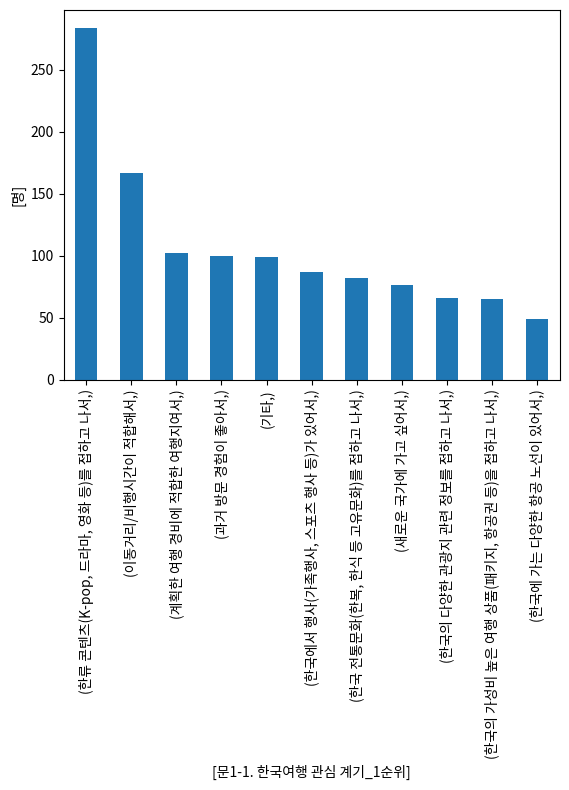

In [12]:
# 관심 계기 1순위 시각화
info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_2순위]', ylabel='[명]'>

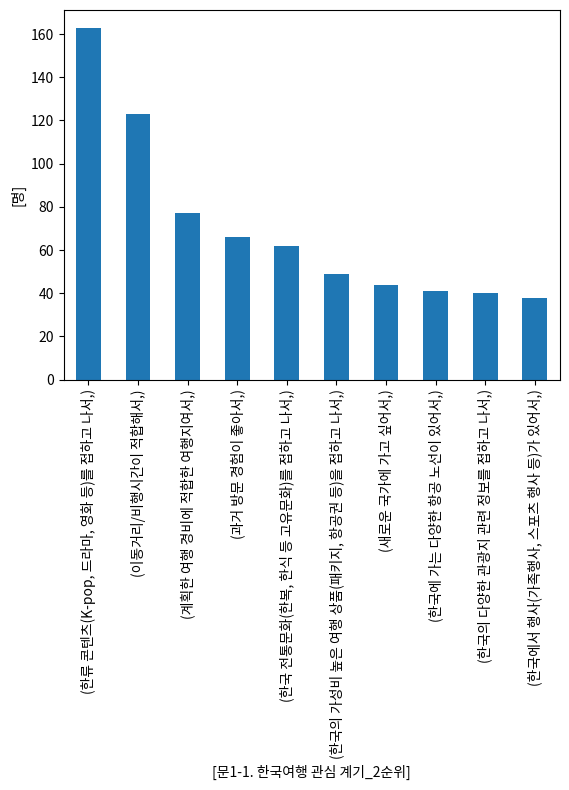

In [13]:
# 관심 계기 2순위 시각화
info_df.loc[info_df['Q1_1a2'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a2', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_3순위]', ylabel='[명]'>

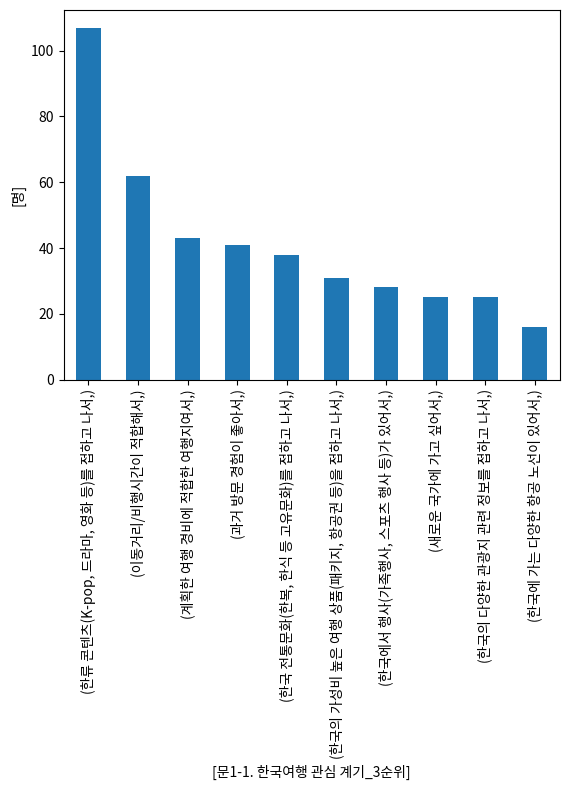

In [14]:
# 관심 계기 3순위 시각화
info_df.loc[info_df['Q1_1a3'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a3', '항목명'].head(1).values
)

관심 계기를 시각화 해서 봤을 경우 (무응답 제외) 1, 2, 3순위 모두 <br>
1위 : (한류 콘텐츠를 접하고 나서) <br>
2위 : (이동거리/비행시간이 적합해서) <br>
3위 : (계획한 여행 경비에 적합한 여행지여서) <br>

일본의 1위인 (새로운 국가에 가고 싶어서)는 7,8위를 차지하고 있어 중국과는 상이한 결과를 보여줌

In [15]:
pd.reset_option('display.max_columns')      # 설정 초기화